<h2 align='center' style='color:blue'>Exercise: Outlier removal using standard deviation and z score<h2>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also **plot histogram** to see how is the data distribution

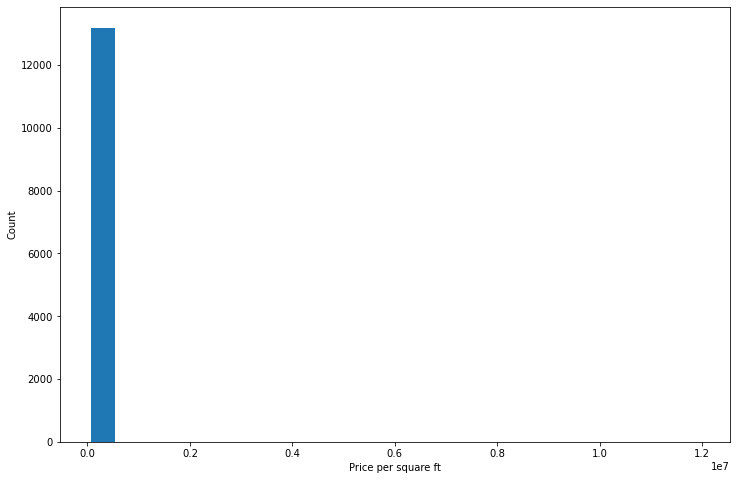

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using **log scale** can make visualization little better

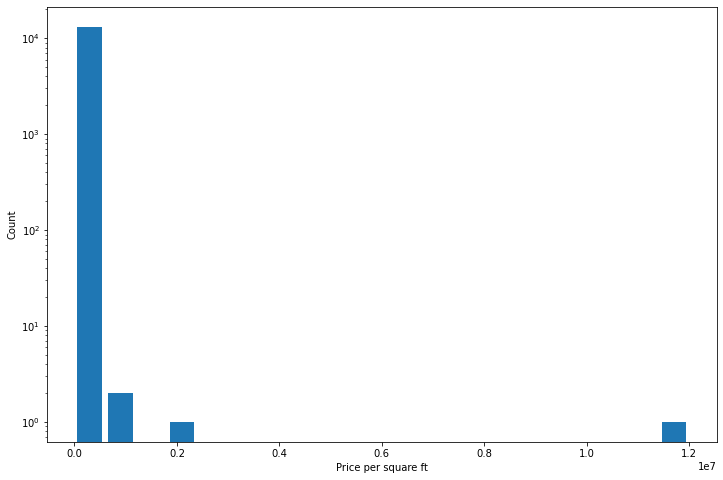

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

<h3 style='color:purple'>(1) Treat outliers using percentile first</h3>

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [7]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) 
Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [9]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
df2.shape

(13172, 7)

In [11]:
df.shape

(13200, 7)

In [12]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

<h3 style='color:purple'>(2) Now remove outliers using 4 standard deviation</h3>

In [13]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
# min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit

23227.73653589432

In [14]:
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
min_limit

-9900.429065502582

In [15]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10000,other,6 Bedroom,1200.0,5.0,280.0,6,23333
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423
11838,Vijayanagar,4 Bedroom,1500.0,4.0,360.0,4,24000
4645,other,10 Bedroom,2416.0,10.0,600.0,10,24834
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509
7561,KR Puram,8 Bedroom,1500.0,7.0,382.0,8,25466
12607,HAL 2nd Stage,8 Bedroom,1000.0,7.0,260.0,8,26000
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000


In [19]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888


In [20]:
df3.shape

(13047, 7)

In [21]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

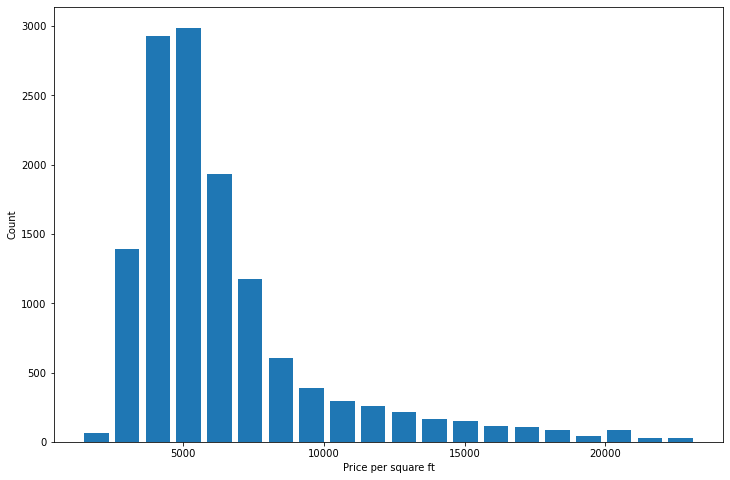

In [22]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

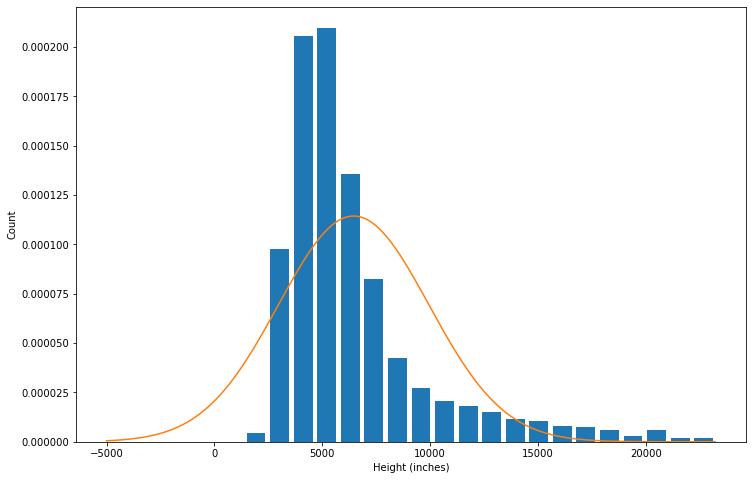

In [23]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

<h3 style='color:purple'>(3) Now remove outliers using z score. Use z score of 4 as your thresold</h3>

In [24]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-24-1d837e91f3f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7953,Bellandur,3 BHK,2666.0,3.0,230.00,3,8627,0.474121
10767,Yeshwanthpur,1 BHK,672.0,1.0,36.85,1,5483,-0.285112
864,Arekere,3 BHK,1740.0,2.0,95.00,3,5459,-0.290907
3673,Binny Pete,4 BHK,2940.0,6.0,280.00,4,9523,0.690493
8230,Electronic City Phase II,4 Bedroom,1900.0,3.0,97.00,4,5105,-0.376394
6278,Ambalipura,4 BHK,3300.0,4.0,329.00,4,9969,0.798196
1765,7th Phase JP Nagar,2 BHK,1180.0,2.0,72.00,2,6101,-0.135873
4238,Whitefield,4 Bedroom,3000.0,4.0,306.00,4,10200,0.853979
9775,Mysore Road,2 BHK,1175.0,2.0,70.50,2,6000,-0.160263
12243,other,3 BHK,1500.0,3.0,75.00,3,5000,-0.401750


In [28]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666,4.830294
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571,5.290325
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291,6.188654
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629,5.545818
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000,10.465136


In [29]:
outliers_z.shape

(125, 8)

In [30]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6391,other,5 Bedroom,4000.0,4.0,1000.0,5,25000,4.427977
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166,4.226578
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333,6.440283
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509,4.309408


In [34]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.825075
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,0.193997
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,2.781282
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.443285
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888,-0.670283


In [35]:
df4.shape

(13047, 8)

In [36]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation